In [1]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *
from Zoro_MD import * 
from help_function import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
#noiseamp = 0.001
noiseamp = 0.1 
decay_factor=0.5
x_star=tools.sparse_vector(n=n,s=s)
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
obj_func=weakly_sparse(n,x_star, noiseamp)
# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":1.0, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [5]:
#IHT set up 
threshold_IHT=6
step_IHT=1/(3*n)
itt_IHT=40 
C_IHT=0.8 # lamda update 
lamda_IHT=1 # threshold param 

In [6]:
#ISTA set up 
threshold_ista=2
step_ista=1/(3*n)
itt_ista=100 
C_ista=0.8 # lamda update 
lamda_ista=3 # threshold param 

In [7]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),x_star=x_star)
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=30)
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6))
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)
opt_ista_ad  = ZORO(x0, obj_func, params,algo='ISTA_ad', function_budget= int(1e6),threshold_IHT=threshold_ista,C_IHT=C_ista,lamda_IHT=lamda_ista,itt_IHT=itt_ista,step_IHT=step_ista)
# the actual optimization routine
termination=False

In [8]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)



In [9]:
performance_log_ZORO_IHT_MD,cost_x=opt_IHT_MD.Zoro_MD()

Estimated f(x_k): 10033.782723 x_k-x_star: 25.972449 function evals: 3042
Estimated f(x_k): 674.567462 x_k-x_star: 9.568913 function evals: 6084
Estimated f(x_k): 91.562117 x_k-x_star: 7.457431 function evals: 9126
Estimated f(x_k): 55.616295 x_k-x_star: 7.313545 function evals: 12168
Estimated f(x_k): 53.489096 x_k-x_star: 7.306544 function evals: 15210
Estimated f(x_k): 53.382469 x_k-x_star: 7.306627 function evals: 18252
Estimated f(x_k): 53.383627 x_k-x_star: 7.306765 function evals: 21294
Estimated f(x_k): 53.387897 x_k-x_star: 7.306807 function evals: 24336
Estimated f(x_k): 53.386067 x_k-x_star: 7.306822 function evals: 27378
Estimated f(x_k): 53.390881 x_k-x_star: 7.306827 function evals: 30420
Estimated f(x_k): 53.393277 x_k-x_star: 7.306826 function evals: 33462
Estimated f(x_k): 53.393765 x_k-x_star: 7.306825 function evals: 36504
Estimated f(x_k): 53.387904 x_k-x_star: 7.306821 function evals: 39546
Estimated f(x_k): 53.388130 x_k-x_star: 7.306816 function evals: 42588
Esti

In [10]:
performance_log_ZORO_Co_MD,cost_Co_MD=opt_Co_MD.Zoro_MD()

Estimated f(x_k): 10033.793075 x_k-x_star: 25.971915 function evals: 3042
Estimated f(x_k): 674.536740 x_k-x_star: 9.567638 function evals: 6084
Estimated f(x_k): 91.538191 x_k-x_star: 7.456922 function evals: 9126
Estimated f(x_k): 55.608030 x_k-x_star: 7.313297 function evals: 12168
Estimated f(x_k): 53.485157 x_k-x_star: 7.306324 function evals: 15210
Estimated f(x_k): 53.383074 x_k-x_star: 7.305155 function evals: 18252
Estimated f(x_k): 53.366118 x_k-x_star: 7.305775 function evals: 21294
Estimated f(x_k): 53.374007 x_k-x_star: 7.305708 function evals: 24336
Estimated f(x_k): 53.372109 x_k-x_star: 7.305446 function evals: 27378
Estimated f(x_k): 53.370567 x_k-x_star: 7.309783 function evals: 30420
Estimated f(x_k): 53.431815 x_k-x_star: 7.309712 function evals: 33462
Estimated f(x_k): 53.434269 x_k-x_star: 7.309167 function evals: 36504
Estimated f(x_k): 53.422643 x_k-x_star: 7.307119 function evals: 39546
Estimated f(x_k): 53.393233 x_k-x_star: 7.306664 function evals: 42588
Esti

In [11]:
performance_log_ZORO_IHT_ad_MD,cost__IHT_ad_x=opt_IHT_ad_MD.Zoro_MD()

Estimated f(x_k): 10033.788257 x_k-x_star: 25.972449 function evals: 3042
Estimated f(x_k): 674.565727 x_k-x_star: 9.568918 function evals: 6084
Estimated f(x_k): 91.567813 x_k-x_star: 7.457431 function evals: 9126
Estimated f(x_k): 55.612467 x_k-x_star: 7.313552 function evals: 12168
Estimated f(x_k): 53.489374 x_k-x_star: 7.306548 function evals: 15210
Estimated f(x_k): 53.386094 x_k-x_star: 7.306631 function evals: 18252
Estimated f(x_k): 53.385810 x_k-x_star: 7.306766 function evals: 21294
Estimated f(x_k): 53.390660 x_k-x_star: 7.306807 function evals: 24336
Estimated f(x_k): 53.392419 x_k-x_star: 7.306817 function evals: 27378
Estimated f(x_k): 53.387971 x_k-x_star: 7.306820 function evals: 30420
Estimated f(x_k): 53.385582 x_k-x_star: 7.306821 function evals: 33462
Estimated f(x_k): 53.389972 x_k-x_star: 7.306821 function evals: 36504
Estimated f(x_k): 53.392971 x_k-x_star: 7.306821 function evals: 39546
Estimated f(x_k): 53.389794 x_k-x_star: 7.306821 function evals: 42588
Esti

In [12]:
performance_log_ZORO_Co,cost_Co=opt_Co.Zoro()
#performance_log_ZORO_IHT=opt_IHT_ad.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()

Estimated f(x_k): 10033.792556 x_k-x_star: 1506.132208  function evals: 3042
Estimated f(x_k): 2268434.230736 x_k-x_star: 1807.094488  function evals: 6084
Estimated f(x_k): 3265590.488716 x_k-x_star: 1811.253565  function evals: 9126
Estimated f(x_k): 3280639.477297 x_k-x_star: 1667.965974  function evals: 12168
Estimated f(x_k): 2782110.493589 x_k-x_star: 1572.604630  function evals: 15210
Estimated f(x_k): 2473085.327263 x_k-x_star: 1575.931338  function evals: 18252
Estimated f(x_k): 2483559.580644 x_k-x_star: 1638.421996  function evals: 21294
Estimated f(x_k): 2684426.636587 x_k-x_star: 2059.748037  function evals: 24336
Estimated f(x_k): 4242561.977725 x_k-x_star: 1885.324195  function evals: 27378
Estimated f(x_k): 3554447.320196 x_k-x_star: 1919.671572  function evals: 30420
Estimated f(x_k): 3685138.945988 x_k-x_star: 1886.009996  function evals: 33462
Estimated f(x_k): 3557033.705063 x_k-x_star: 2329.828536  function evals: 36504
Estimated f(x_k): 5428101.009272 x_k-x_star: 

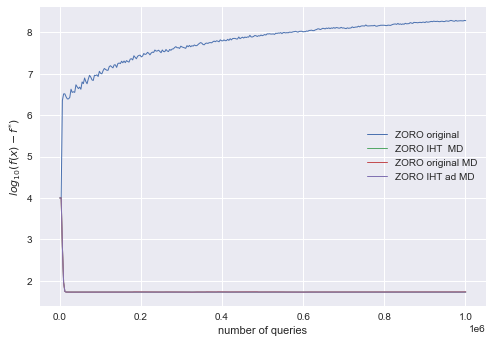

In [13]:
fig, ax = plt.subplots()
ax.plot(np.array(performance_log_ZORO_Co)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co)[:,1])), linewidth=1, label = "ZORO original")
#ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 #(np.array(performance_log_ZORO_Co_MD)[:,1]), linewidth=1, label = "ZORO_MD")
ax.plot(np.array(performance_log_ZORO_IHT_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_MD)[:,1])), linewidth=1, label = "ZORO IHT  MD")
ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co_MD)[:,1])), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(performance_log_ZORO_IHT_ad_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_ad_MD)[:,1])), linewidth=1, label = "ZORO IHT ad MD")
plt.xlabel('number of queries')
plt.ylabel('$log_{10}(f(x)-f^{*})$')
leg = ax.legend()
plt.show()

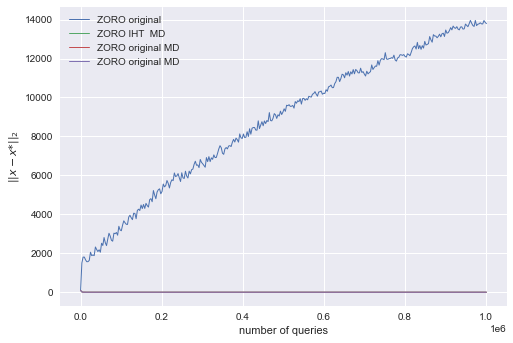

In [14]:
fig, ax = plt.subplots()
ax.plot(np.array(cost_Co)[:,0],
 (np.array(cost_Co)[:,1]), linewidth=1, label = "ZORO original")
#ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 #(np.array(performance_log_ZORO_Co_MD)[:,1]), linewidth=1, label = "ZORO_MD")
ax.plot(np.array(cost_x)[:,0],
 (np.array(cost_x)[:,1]), linewidth=1, label = "ZORO IHT  MD")
ax.plot(np.array(cost_Co_MD)[:,0],
 (np.array(cost_Co_MD)[:,1]), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(cost_Co_MD)[:,0],
 (np.array(cost_Co_MD)[:,1]), linewidth=1, label = "ZORO original MD")
plt.xlabel('number of queries')
plt.ylabel('$ || x-x{*}||_{2} $')
leg = ax.legend()
plt.show()